In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("/home/machouba/Documents/CC_42/Train_knight.csv")
data['knight'] = data['knight'].map({'Jedi': 1, 'Sith': 0})

data

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121,0
1,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.094980,0.1582,0.05395,...,30.88,186.80,2398.0,0.1512,0.31500,0.53720,0.23880,0.2768,0.07615,1
2,10.970,17.20,71.73,371.5,0.08915,0.11130,0.094570,0.036130,0.1489,0.06640,...,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532,0
3,11.620,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270,0
4,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.618,11.79,54.34,224.5,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,...,15.40,59.90,274.9,0.1733,0.12390,0.11680,0.04419,0.3220,0.09026,0
394,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191,0
395,11.640,18.33,75.17,412.5,0.11420,0.10170,0.070700,0.034850,0.1801,0.06520,...,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097,0
396,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.030290,0.1945,0.06322,...,26.83,72.22,361.2,0.1559,0.23020,0.26440,0.09749,0.2622,0.08490,0


In [3]:
X = data.drop('knight', axis=1)
y = data['knight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [4]:
y_pred = knn.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1]
Accuracy: 98.75%


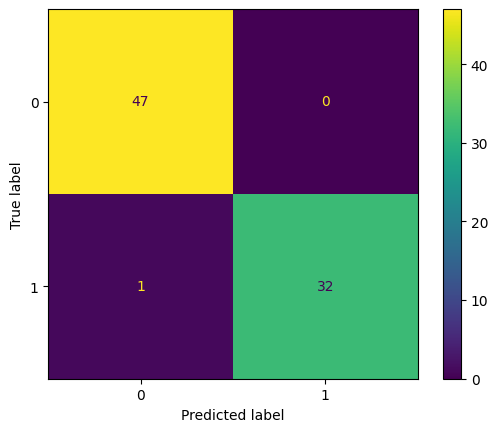

In [5]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

Text(0, 0.5, 'Accuracy Score')

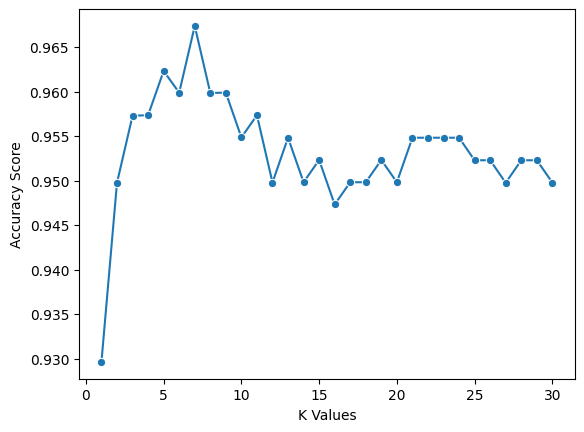

In [6]:
k_values = range(1, 31)
y_pred_score = []

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    y_pred_score.append(score.mean())

sns.lineplot(x=k_values, y=y_pred_score, marker= 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [7]:
best_idx = np.argmax(y_pred_score)
best_k = k_values[best_idx]

print(f"Best K: {best_k} with accuracy: {y_pred_score[best_idx] * 100:.2f}%")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Best K: 7 with accuracy: 96.74%


,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
y_pred_best = knn.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best K ({best_k}): {accuracy_best * 100:.2f}%")
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.2f}")

Accuracy with best K (7): 100.00%
Precision: 1.00, Recall: 1.00
F1 Score: 1.00


In [13]:
data_test = pd.read_csv("/home/machouba/Documents/CC_42/Test_knight.csv")

result = knn.predict(scaler.transform(data_test))

result = pd.DataFrame(result, columns=['knight'])
result['knight'] = result['knight'].map({1: 'Jedi', 0: 'Sith'})
result.to_csv("KNN.txt", index=False, header=False)

# 🔄 Principe de la Validation Croisée

## Pourquoi croiser les valeurs ?

**Sans validation croisée :**
- 1 seule division train/test
- Score dépend du "hasard" de la division
- Risque de surestimer ou sous-estimer les performances

**Avec validation croisée (5-fold) :**
- 5 divisions différentes
- Chaque observation est testée exactement 1 fois
- Score = moyenne de 5 tests indépendants
- Estimation plus fiable et robuste

## Dans notre optimisation K :
Pour chaque valeur de K (1, 2, 3, ..., 30), nous obtenons 5 scores différents et prenons la moyenne. Cela nous donne une meilleure estimation de la vraie performance de chaque K.